In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression
import numpy as np

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
# Basic EDA
# Shape of the dataset (rows, columns)

print("Shape of X:", X.shape)
print("Number of dimensions of X:", X.ndim)


Shape of X: (150, 4)
Number of dimensions of X: 2


In [6]:
# Feature names
print("Feature Names:", iris.feature_names)

# Target classes
print("Target Classes:", iris.target_names)

# Target values (labels)
print("Target labels (y):", y)  


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']
Target labels (y): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Split the dataset, scaling the dataset using standardsscaler
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()   
X_trainS = scaler.fit_transform(X_train)
X_validS = scaler.transform(X_valid)


## Explore  

In [9]:
from sklearn.model_selection import GridSearchCV

#Define combination of hyperparamters with logisticregression with LASSO rugularization

param_grid = {'solver': ['liblinear', 'saga'], 'penalty': ['l1'], 'C': [0.01,0.05, 0.1,0.2, 1, 5, 10],'max_iter':[10000, 5000]}

# Define the model

L1_Logistic = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(L1_Logistic, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(X_trainS, y_train)

# Print the best parameters and best score

print('Best Optimal hyperparameter combination:', grid_search.best_params_, 'F1 score:', round(grid_search.best_score_, 4))



Best Optimal hyperparameter combination: {'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'} F1 score: 0.9571


In [10]:
#Define combination of hyperparamters with logisticregression with Ridge rugularization

param_grid = {'solver': ['liblinear', 'lbfgs','newton-cg'], 'penalty': ['l2'], 'C': [0.001, 0.01,0.05, 0.1,0.2, 1, 5, 10],'max_iter':[10000,5000,1000]}

L2_logistic = LogisticRegression()

grid_search = GridSearchCV(L2_logistic, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(X_trainS, y_train)


print('Best Optimal hyperparameter combination:', grid_search.best_params_, 'F1 score:', round(grid_search.best_score_, 4))

Best Optimal hyperparameter combination: {'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'} F1 score: 0.9571


In [53]:
#Elastic

param_grid = {'solver': ['saga'], 'penalty': ['elasticnet'], 'C': [0.001, 0.01,0.05, 0.1,0.2, 1, 5, 10],'l1_ratio':[0.1,0.3,0.5,0.7,0.9],'max_iter':[10000,5000,1000]}

Ela_logistic = LogisticRegression()

grid_search = GridSearchCV(Ela_logistic, param_grid, cv=5,scoring='f1_macro')
grid_search.fit(X_trainS, y_train)


print('Best Optimal hyperparameter combination:', grid_search.best_params_, 'F1 score:', round(grid_search.best_score_, 4))

Best Optimal hyperparameter combination: {'C': 1, 'l1_ratio': 0.1, 'max_iter': 10000, 'penalty': 'elasticnet', 'solver': 'saga'} F1 score: 0.9571


In [56]:
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 1, 5, 10],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'max_iter': [10000, 5000, 1000],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             scoring='f1_macro')

In [59]:
from sklearn.metrics import accuracy_score, f1_score

print("Grid Search CV Best Parameters:", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_validS)
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred, average='macro')  

print(f"Validation Accuracy with Grid Search CV Best Model: {accuracy:.4f}")
print(f"Validation F1 Score (Macro) with Grid Search CV Best Model: {f1:.4f}")

Grid Search CV Best Parameters: {'C': 1, 'l1_ratio': 0.1, 'max_iter': 10000, 'penalty': 'elasticnet', 'solver': 'saga'}
Validation Accuracy with Grid Search CV Best Model: 1.0000
Validation F1 Score (Macro) with Grid Search CV Best Model: 1.0000


In [63]:
#use RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'solver': ['liblinear', 'saga'], 
    'penalty': ['l1'],  #
    'C': np.logspace(-3, 3, 10),  
    'max_iter': [5000, 10000]
}

L1_Logistic = LogisticRegression()

random_search = RandomizedSearchCV(L1_Logistic, param_grid, n_iter=10, cv=5, scoring='f1_macro', random_state=42)
random_search.fit(X_trainS, y_train)

print('Best Random Search hyperparameter combination:', random_search.best_params_, 'F1 score:', round(random_search.best_score_, 4))


Best Random Search hyperparameter combination: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 10000, 'C': 10.0} F1 score: 0.9571


In [ ]:
## Apply Optuna
# https://optuna.org/ 

# Adaptive Search: Optuna uses Bayesian optimization, an adaptive search algorithm. It adapts its search strategy based on the performance of previously sampled hyperparameter configurations.
# 2.Efficient Search: Due to its adaptive nature, Optuna tends to explore promising regions of the hyperparameter space more efficiently, often requiring fewer trials.
# 3.Integration with ML Frameworks: Optuna seamlessly integrates with popular machine learning frameworks like Scikit-Learn, PyTorch, and TensorFlow.

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def objective(trial):
    C = trial.suggest_float('C', 1e-3, 1e2, log=True)  
    
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    
    max_iter = trial.suggest_categorical('max_iter', [1000, 5000, 10000])
    
    model = LogisticRegression(C=C, solver=solver, penalty='l1', max_iter=max_iter)
    
    f1_scores = cross_val_score(model, X_trainS, y_train, cv=5, scoring='f1_macro')
    
    return np.mean(f1_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Try 50 different combinations

print('Best Optuna hyperparameter combination:', study.best_params)
print('Best F1 score:', round(study.best_value, 4))


[I 2024-10-10 01:17:11,356] A new study created in memory with name: no-name-8e652fba-886b-4d4a-995b-8da647dfa7f0
[I 2024-10-10 01:17:11,396] Trial 0 finished with value: 0.9411669445105977 and parameters: {'C': 0.7437369314900535, 'solver': 'saga', 'max_iter': 10000}. Best is trial 0 with value: 0.9411669445105977.
[I 2024-10-10 01:17:11,406] Trial 1 finished with value: 0.16666666666666666 and parameters: {'C': 0.006861253164758299, 'solver': 'liblinear', 'max_iter': 10000}. Best is trial 0 with value: 0.9411669445105977.
[I 2024-10-10 01:17:11,472] Trial 2 finished with value: 0.9474414543145194 and parameters: {'C': 4.944692271455829, 'solver': 'saga', 'max_iter': 5000}. Best is trial 2 with value: 0.9474414543145194.
[I 2024-10-10 01:17:11,483] Trial 3 finished with value: 0.16666666666666666 and parameters: {'C': 0.012024630066699831, 'solver': 'liblinear', 'max_iter': 1000}. Best is trial 2 with value: 0.9474414543145194.
[I 2024-10-10 01:17:11,504] Trial 4 finished with value: 

Best Optuna hyperparameter combination: {'C': 1.6102541701091049, 'solver': 'saga', 'max_iter': 10000}
Best F1 score: 0.9571


In [71]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

def objective(trial):
    C = trial.suggest_float('C', 1e-3, 1e2, log=True)  
    
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'newton-cg'])
    
    max_iter = trial.suggest_categorical('max_iter', [1000, 5000, 10000])
    
    model = LogisticRegression(C=C, solver=solver, penalty='l2', max_iter=max_iter)
    
    f1_scores = cross_val_score(model, X_trainS, y_train, cv=5, scoring='f1_macro')
    
    return np.mean(f1_scores)

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)  # Try 50 different combinations

print('Best Optuna hyperparameter combination:', study.best_params)
print('Best F1 score:', round(study.best_value, 4))


[I 2024-10-10 01:17:49,917] A new study created in memory with name: no-name-d2c6109b-921e-4a86-899a-ebb26df52014
[I 2024-10-10 01:17:49,936] Trial 0 finished with value: 0.8824743230625585 and parameters: {'C': 0.07122650563283937, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 0 with value: 0.8824743230625585.
[I 2024-10-10 01:17:49,954] Trial 1 finished with value: 0.9166666666666667 and parameters: {'C': 0.16209918103103574, 'solver': 'lbfgs', 'max_iter': 1000}. Best is trial 1 with value: 0.9166666666666667.
[I 2024-10-10 01:17:49,976] Trial 2 finished with value: 0.9474414543145194 and parameters: {'C': 3.236473693618042, 'solver': 'newton-cg', 'max_iter': 5000}. Best is trial 2 with value: 0.9474414543145194.
[I 2024-10-10 01:17:49,993] Trial 3 finished with value: 0.8453931460123411 and parameters: {'C': 0.009721623459573796, 'solver': 'lbfgs', 'max_iter': 5000}. Best is trial 2 with value: 0.9474414543145194.
[I 2024-10-10 01:17:50,003] Trial 4 finished with value: 0.8538

Best Optuna hyperparameter combination: {'C': 1.0055863000324068, 'solver': 'newton-cg', 'max_iter': 10000}
Best F1 score: 0.9571


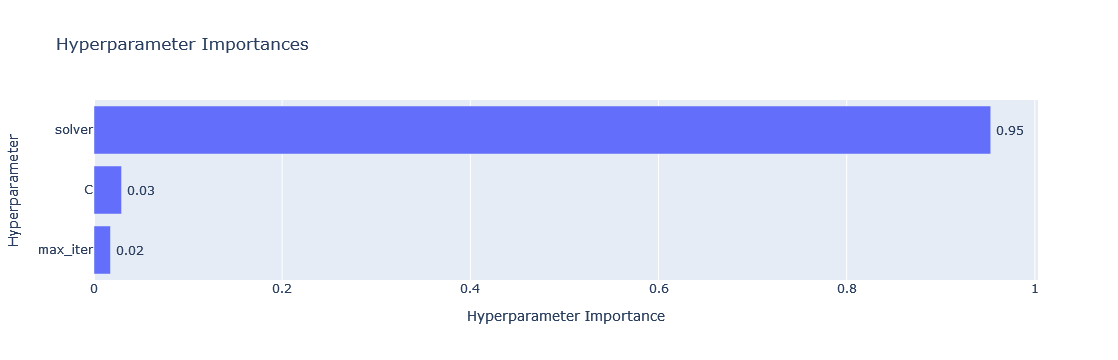

In [75]:
optuna.visualization.plot_param_importances(study)

# understand which hyperparameters are most critical in affecting the performance of the model


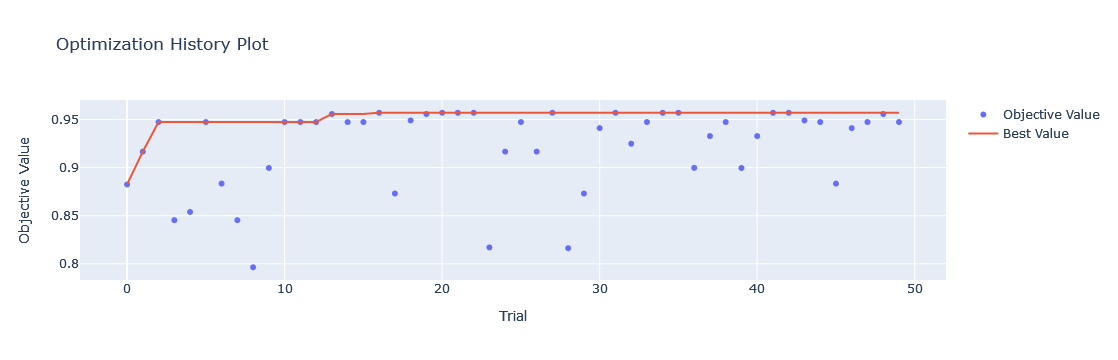

In [76]:
optuna.visualization.plot_optimization_history(study)

# visualize how the objective value has changed over time as the optimization progresses.